## Data Description
This project focuses on predicting life expectancy by leveraging a comprehensive global dataset that combines demographic, economic, social, and health-related indicators for 193 countries over the period 2000–2015. Using Python, the study aims to identify key determinants influencing life expectancy, with special emphasis on immunization factors (such as Hepatitis B, Polio, and Diphtheria), mortality rates, and the Human Development Index, which were often overlooked in earlier research. By applying multiple Regression and mixed-effects models, the project seeks to uncover both global trends and country-specific patterns. The insights derived from this analysis can help policymakers pinpoint critical areas for intervention to enhance public health outcomes and improve overall life expectancy. \
Data Set from: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who \
Reference: https://scikit-learn.org/stable/

In [2]:
#Importing the data and Suppressing othe warnings.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
LED = pd.read_csv(r"C:\Users\msour\OneDrive\Documents\IVY\Project DL\Life_Expectancy_Data.csv")
LED.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Basic Data Analysis

In [3]:
#Removing any kind of duplicate present in the data. 
print(f"The original dataset contains {LED.shape[0]} rows")
LED.drop_duplicates()
print(f"After removing the duplicate records, it contains {LED.shape[0]} rows. \nHence no duplicate columns")

The original dataset contains 2938 rows
After removing the duplicate records, it contains 2938 rows. 
Hence no duplicate columns


In [4]:
LED.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [5]:
LED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
import numpy as np
np.set_printoptions(suppress = True)
round(LED.describe(include = 'all'),2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.00,2938,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.52,NaN,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,NaN,4.61,NaN,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,NaN,2000.00,NaN,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,NaN,2004.00,NaN,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,NaN,2008.00,NaN,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,NaN,2012.00,NaN,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30


In the Dataset all the features having **object** as their datatype or having less than equal to **10 uique value** is classified as Categorical column and the rest is classified as continuous column

In [7]:
#separating the categorical and numerical column
cont_cols = []
cat_cols = []
for cols in LED.columns.to_list():
    if LED[cols].dtype == 'object' or LED[cols].nunique() <= 10:
        cat_cols.append(cols)
    else:
        cont_cols.append(cols)
print("The continuous variable are : \n",cont_cols)
print("\n The categorical variables are : \n",cat_cols)

The continuous variable are : 
 ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

 The categorical variables are : 
 ['Country', 'Status']


<b> Target Variable :</b>  'Life expectancy '\
<b> continuous variable :</b> ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']\
<b> categorical variables :</b> ['Country', 'Status']

## Exploratory Data Analysis

In [8]:
#Checking how many null values are present in the Traget Variable. if it is negligible we can drop those rows. 
target = 'Life expectancy '
print("The total null values in the target variable is : ",LED[target].isnull().sum())
#since the total record is 2938, we can drop these 10 rows as it impact the data. 
LED1 = LED.dropna(subset=[target])
print("The number of records after the treatment is : ",LED1.shape[0])

The total null values in the target variable is :  10
The number of records after the treatment is :  2928


As from **LED.info()** we can see that their are missing values in the continuos columns only. So, the continuous variable is only treated. The skewness of each of the column is measured. if the absolute value of skewness is greater than 0.5 then it is treated with median otherwise it is treated with mean.

In [9]:
cont_var = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 
            ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 
            ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Cont_del = [] #listing the columns having null values more than 30 percent.
Cont_treat = [] #listing the columns that are to be treated.

for col in cont_var:
    miss_val = (LED1[col].isnull().sum())/LED1.shape[0]
    if miss_val < 0.3 and miss_val > 0:
        Cont_treat.append(col)
    elif miss_val >0.3:
        Cont_del.append(col)
    else:
        continue
print("Columns to be treated are :",Cont_treat)
print("Columns to be removed are :",Cont_del)
print("\n")
for col in Cont_treat:
    if abs(LED1[col].skew()) < 0.5:
        print(f"The Skewness of {col} is {LED1[col].skew()} and is treated with mean")
        LED1[col].fillna(LED1[col].mean(), inplace=True)
    else :
        print(f"The Skewness of {col} is {LED1[col].skew()} and is treated with median")
        LED1[col].fillna(LED1[col].median(), inplace=True)

Columns to be treated are : ['Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Columns to be removed are : []


The Skewness of Alcohol is 0.5872759823338338 and is treated with median
The Skewness of Hepatitis B is -1.933773510510973 and is treated with median
The Skewness of  BMI  is -0.23055870673126672 and is treated with mean
The Skewness of Polio is -2.097958050876243 and is treated with median
The Skewness of Total expenditure is 0.5772333235968542 and is treated with median
The Skewness of Diphtheria  is -2.072601052317205 and is treated with median
The Skewness of GDP is 3.202781401465919 and is treated with median
The Skewness of Population is 15.909652757741815 and is treated with median
The Skewness of  thinness  1-19 years is 1.710626013574815 and is treated with median
The Skewness of  thinness 5-9 years is 1.776590740902215 an

In [10]:
#Number of missing values after treating each column
LED1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Univariate Analysis

skewness :  -0.6386


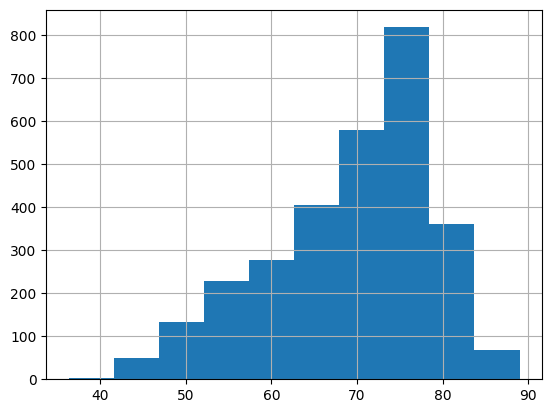

In [11]:
#checking th distribution if the traget Varible.
import matplotlib.pyplot as plt
LED1[target].hist()
print("skewness : ",round(LED1[target].skew(),4))

The target variable is negatively skewed and not that bad for machine learning models. Hence, we can proceed with the data.

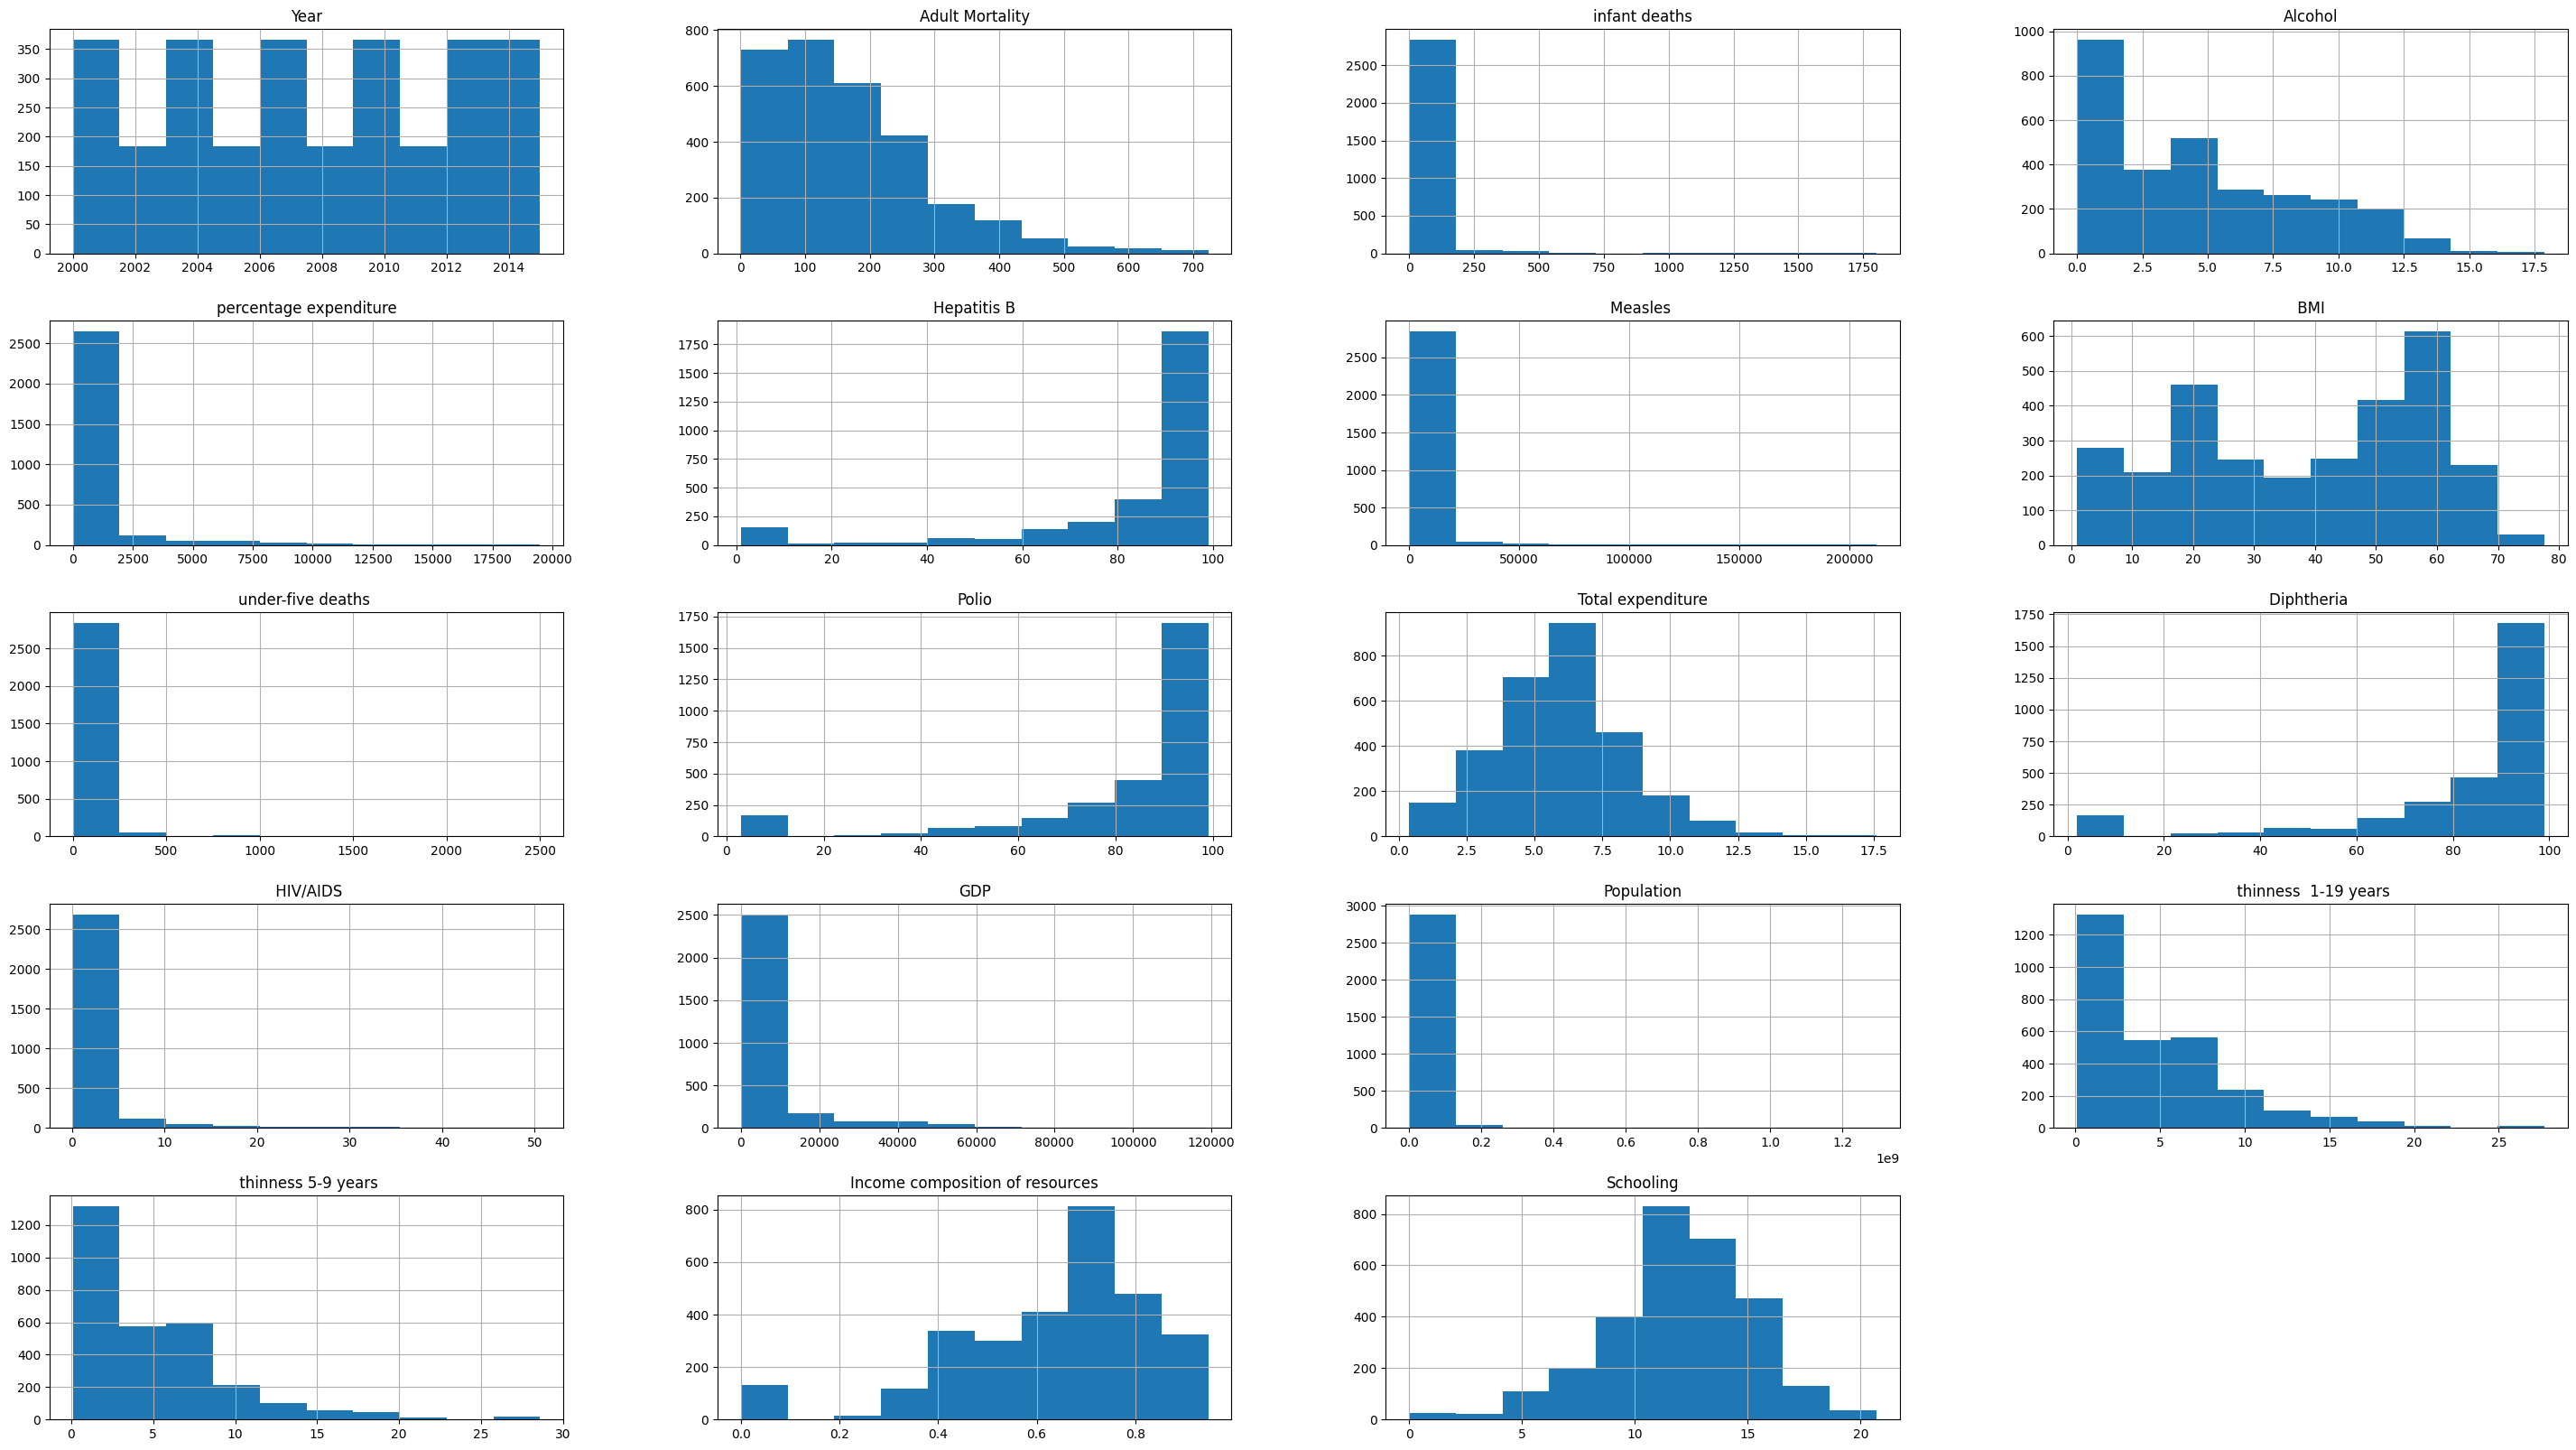

In [12]:
#checking the distribution for the Continuous Predictors
cont_var = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 
            ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 
            ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
LED1[cont_var].hist(figsize=(36,20));

## Outlier Treatment for Continuous Predictor
The following column should be treated.\
'Hepatitis B', 'Polio', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources'

In [13]:
#creating a function that detects the outliers for continuous variable and treat them
'''def continuous_outlier_treatment(DF,cont_treat_var): # Inter quartile Range
    import pandas as pd
    import numpy as np
    for col in cont_treat_var:
        Q1 = DF[col].quantile(0.25)
        Q3 = DF[col].quantile(0.75)
        IQR = Q3-Q1
        lb = Q1-(1.5*IQR) #Lower Bound
        ub = Q3+(1.5*IQR) #Upper Bound
        #Replacing outliers with boundary values(Winsorizing)
        DF[col] = np.where(DF[col] < lb, lb, np.where(DF[col] > ub, ub, DF[col]))'''

def continuous_outlier_treatment(DF,cont_treat_var): # Z score
    import pandas as pd
    import numpy as np
    for col in cont_treat_var:
        median = DF[col].median() # to replace outliers with median
        mean = DF[col].mean()
        std = DF[col].std()
        z_scores = (DF[col] - mean) / std
            
        threshold = 3 # Defining a threshold for outliers, commonly 3 or -3
        # treating outliers that is replacing them with the median value of the column
        DF[col] = np.where(z_scores.abs() > threshold, median, DF[col])

In [14]:
cont_treat_var = ['Hepatitis B', 'Polio', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years', 
                  'Income composition of resources']
continuous_outlier_treatment(LED1,cont_treat_var)

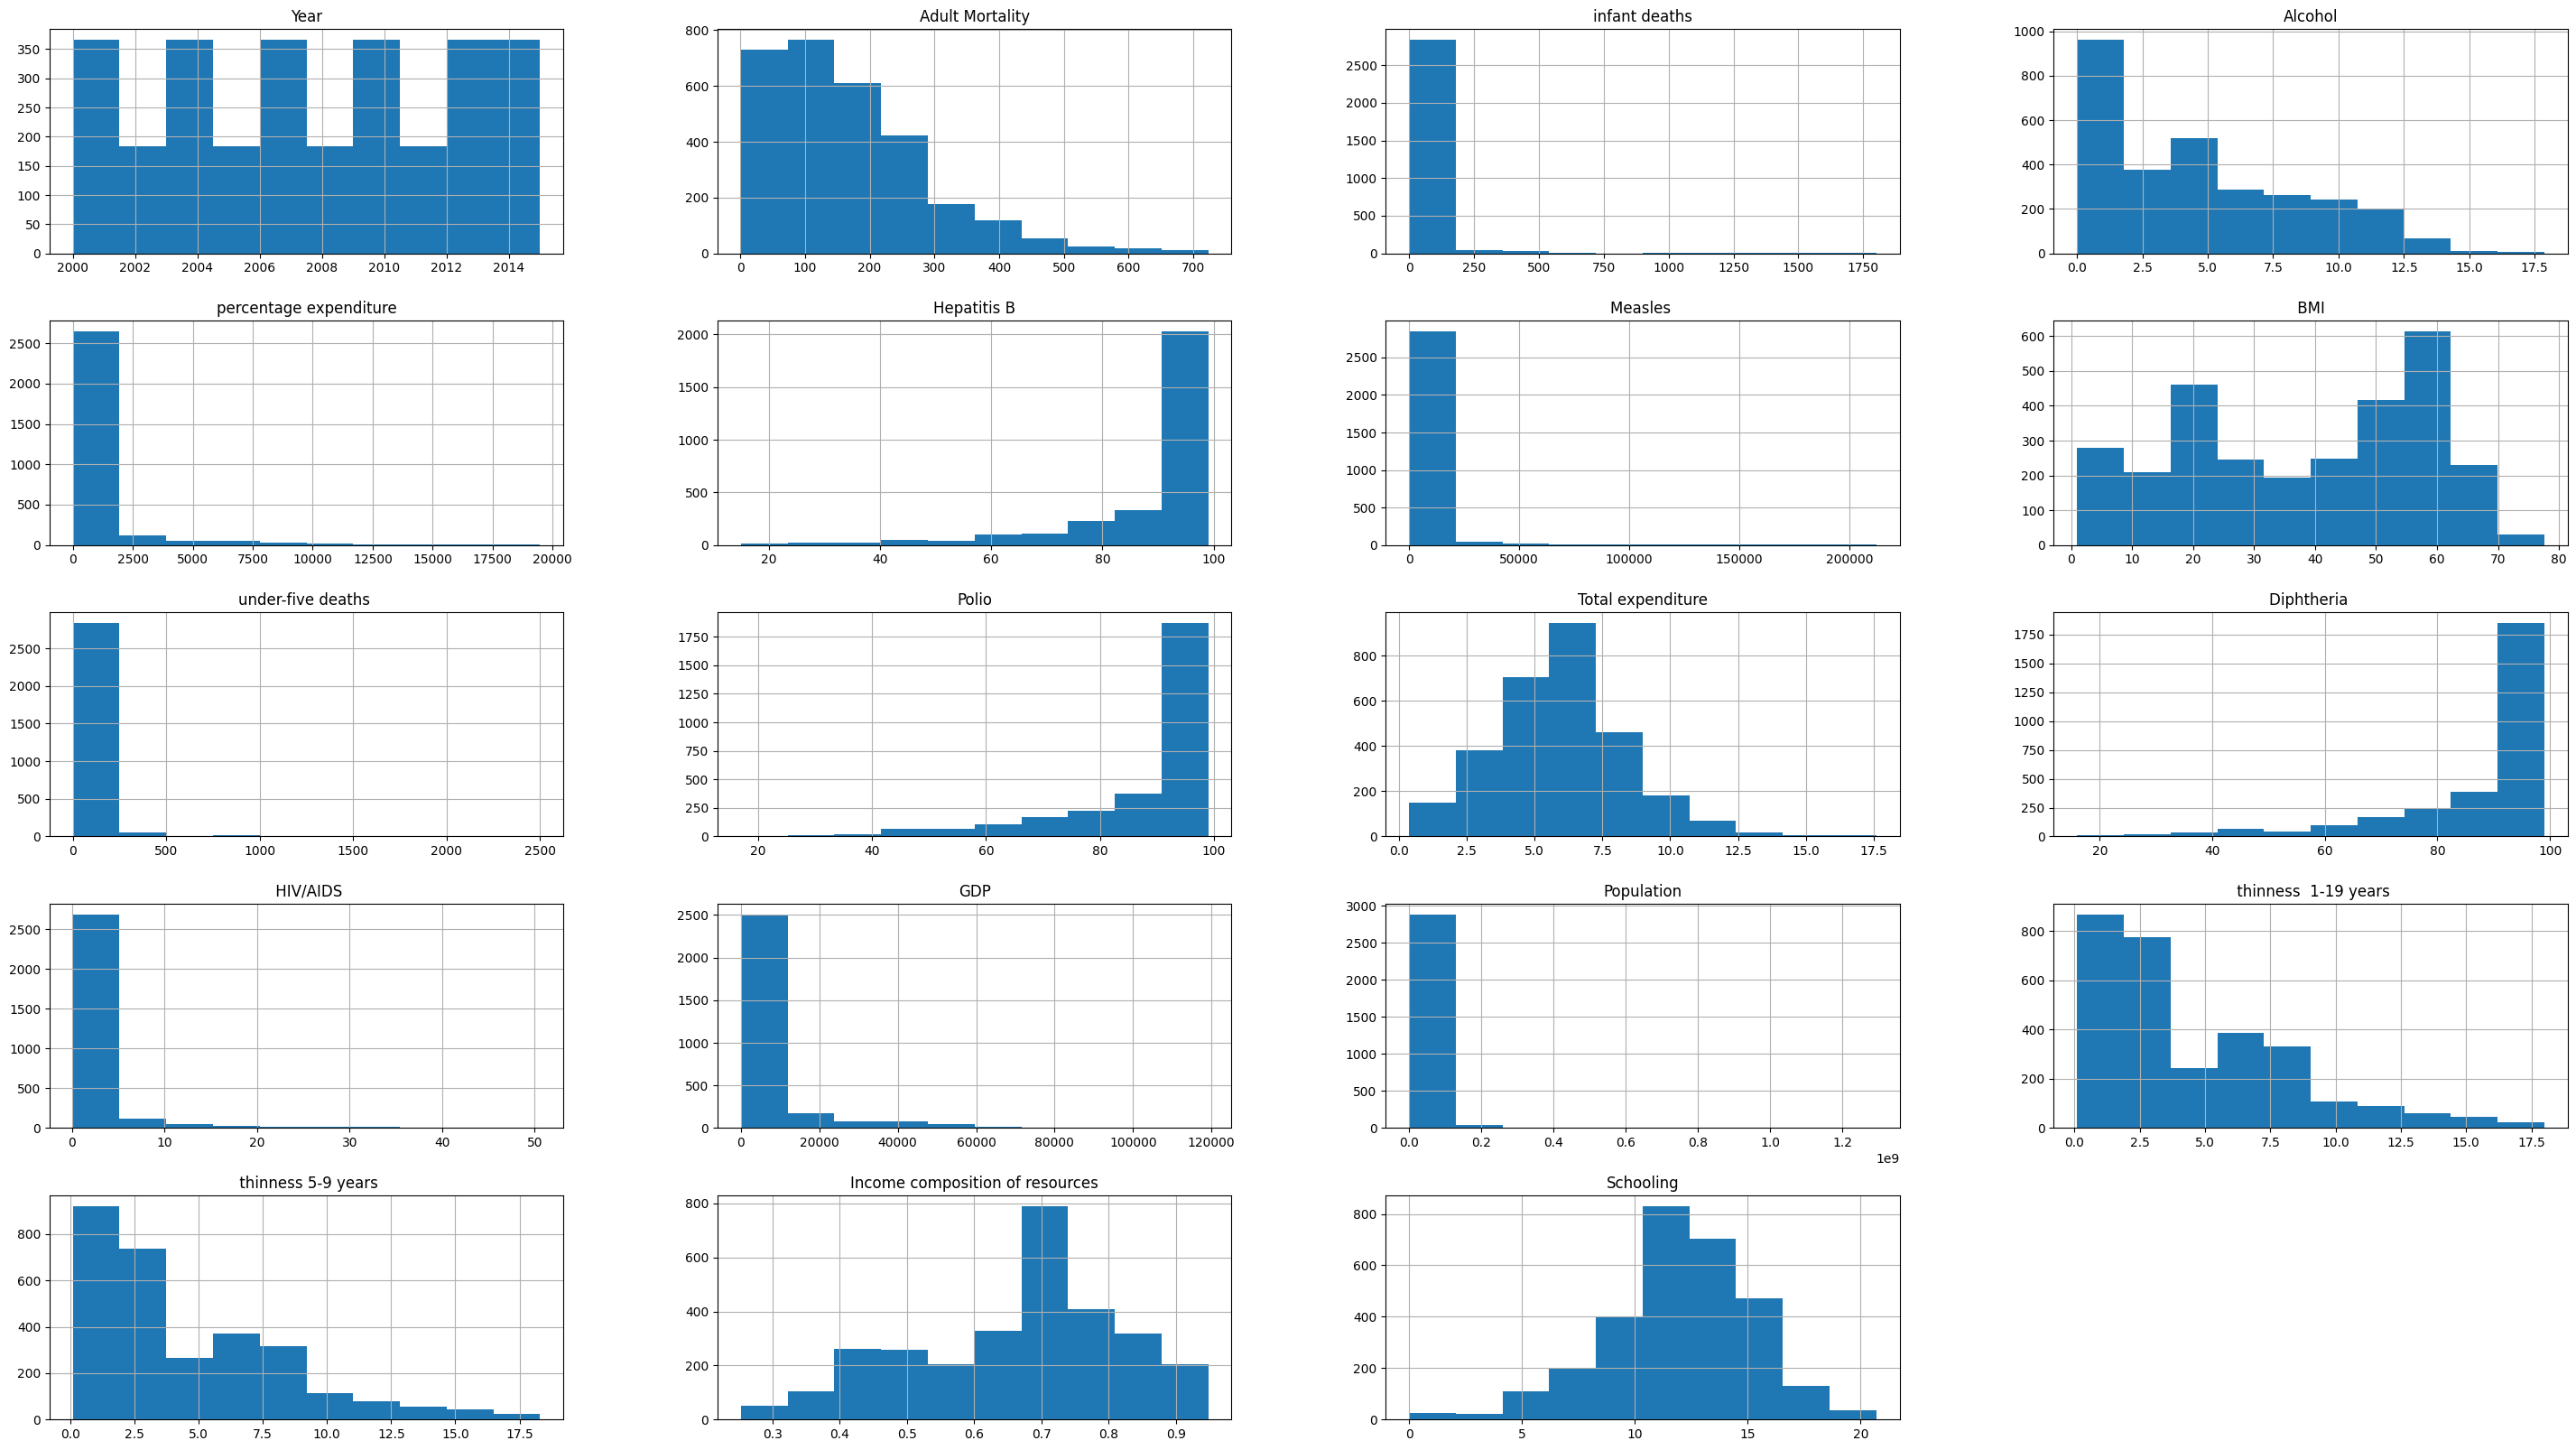

In [15]:
#recheking the distribution
LED1[cont_var].hist(figsize=(36,20));

The distribution of each of the variables does not have any outliers as concluded from the graph after treating the outliers, hence is ready for further testing.

In [16]:
#Checking the distribution for the Categorical variable. Defining a function to plot bar Chart
def plotbarcharts(inpdata,Catvar):
    import math
    import matplotlib.pyplot as plt
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Catvar)/3),figsize = (20,5))
    subplot.flatten()
    for i,cat in enumerate(Catvar):
        inpdata.groupby([cat]).size().plot(kind = 'bar',ax = subplot[i])
        subplot[i].set_title(cat)
    fig.suptitle("Distribution for Categorical Variables",fontsize=16, y=1.02, ha='center')

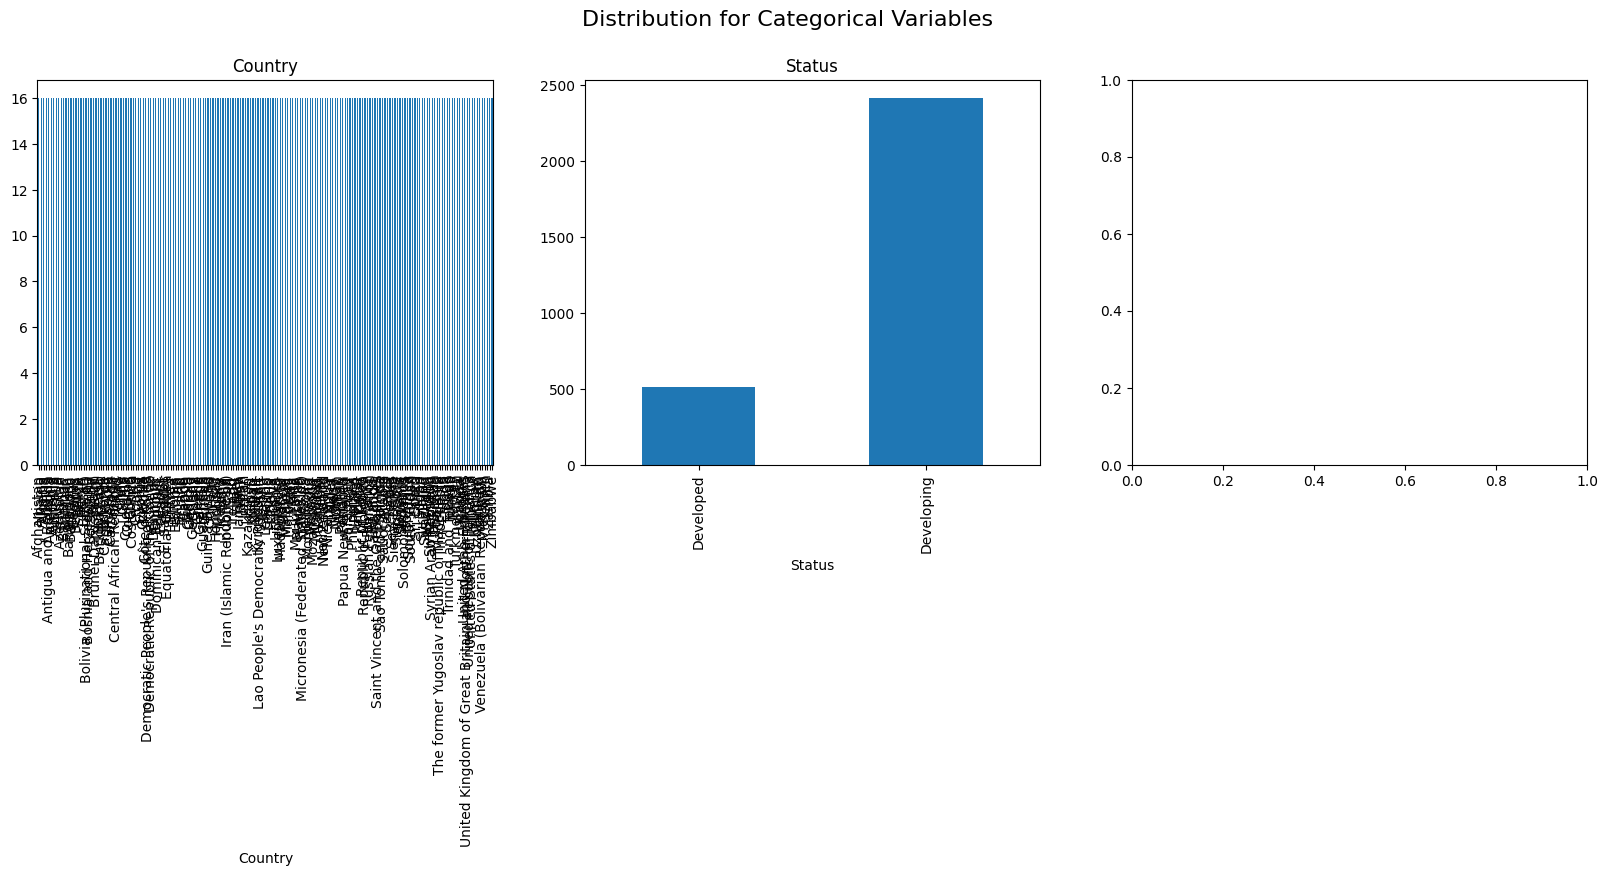

In [17]:
Catvar = ['Country', 'Status']
plotbarcharts(LED1,Catvar)

The Dataset contains a fair number of records for each of the category in each of the predictors. Hence, no need to treat outliers.

# Bivariate Analysis

In [18]:
#Bivariate Analysis - Continuous vs Target. Defining a function to plot Continuous vs Target variable.
def contbivariate(inpdata,Contvar,Target):
    import matplotlib.pyplot as plt
    import math
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Contvar)/3),figsize = (40,60))
    fig.suptitle("Bivariate Analysis for Continuous Variable",fontsize=16)
    subplot = subplot.flatten()
    for i,cont in enumerate(Contvar):
        inpdata.plot.scatter(x=Target,y=cont,marker='o',ax=subplot[i])
        subplot[i].set_title(f"{cont} vs {Target}")
    for j in range(len(Contvar), len(subplot)):
        subplot[j].set_visible(False)
    plt.tight_layout()

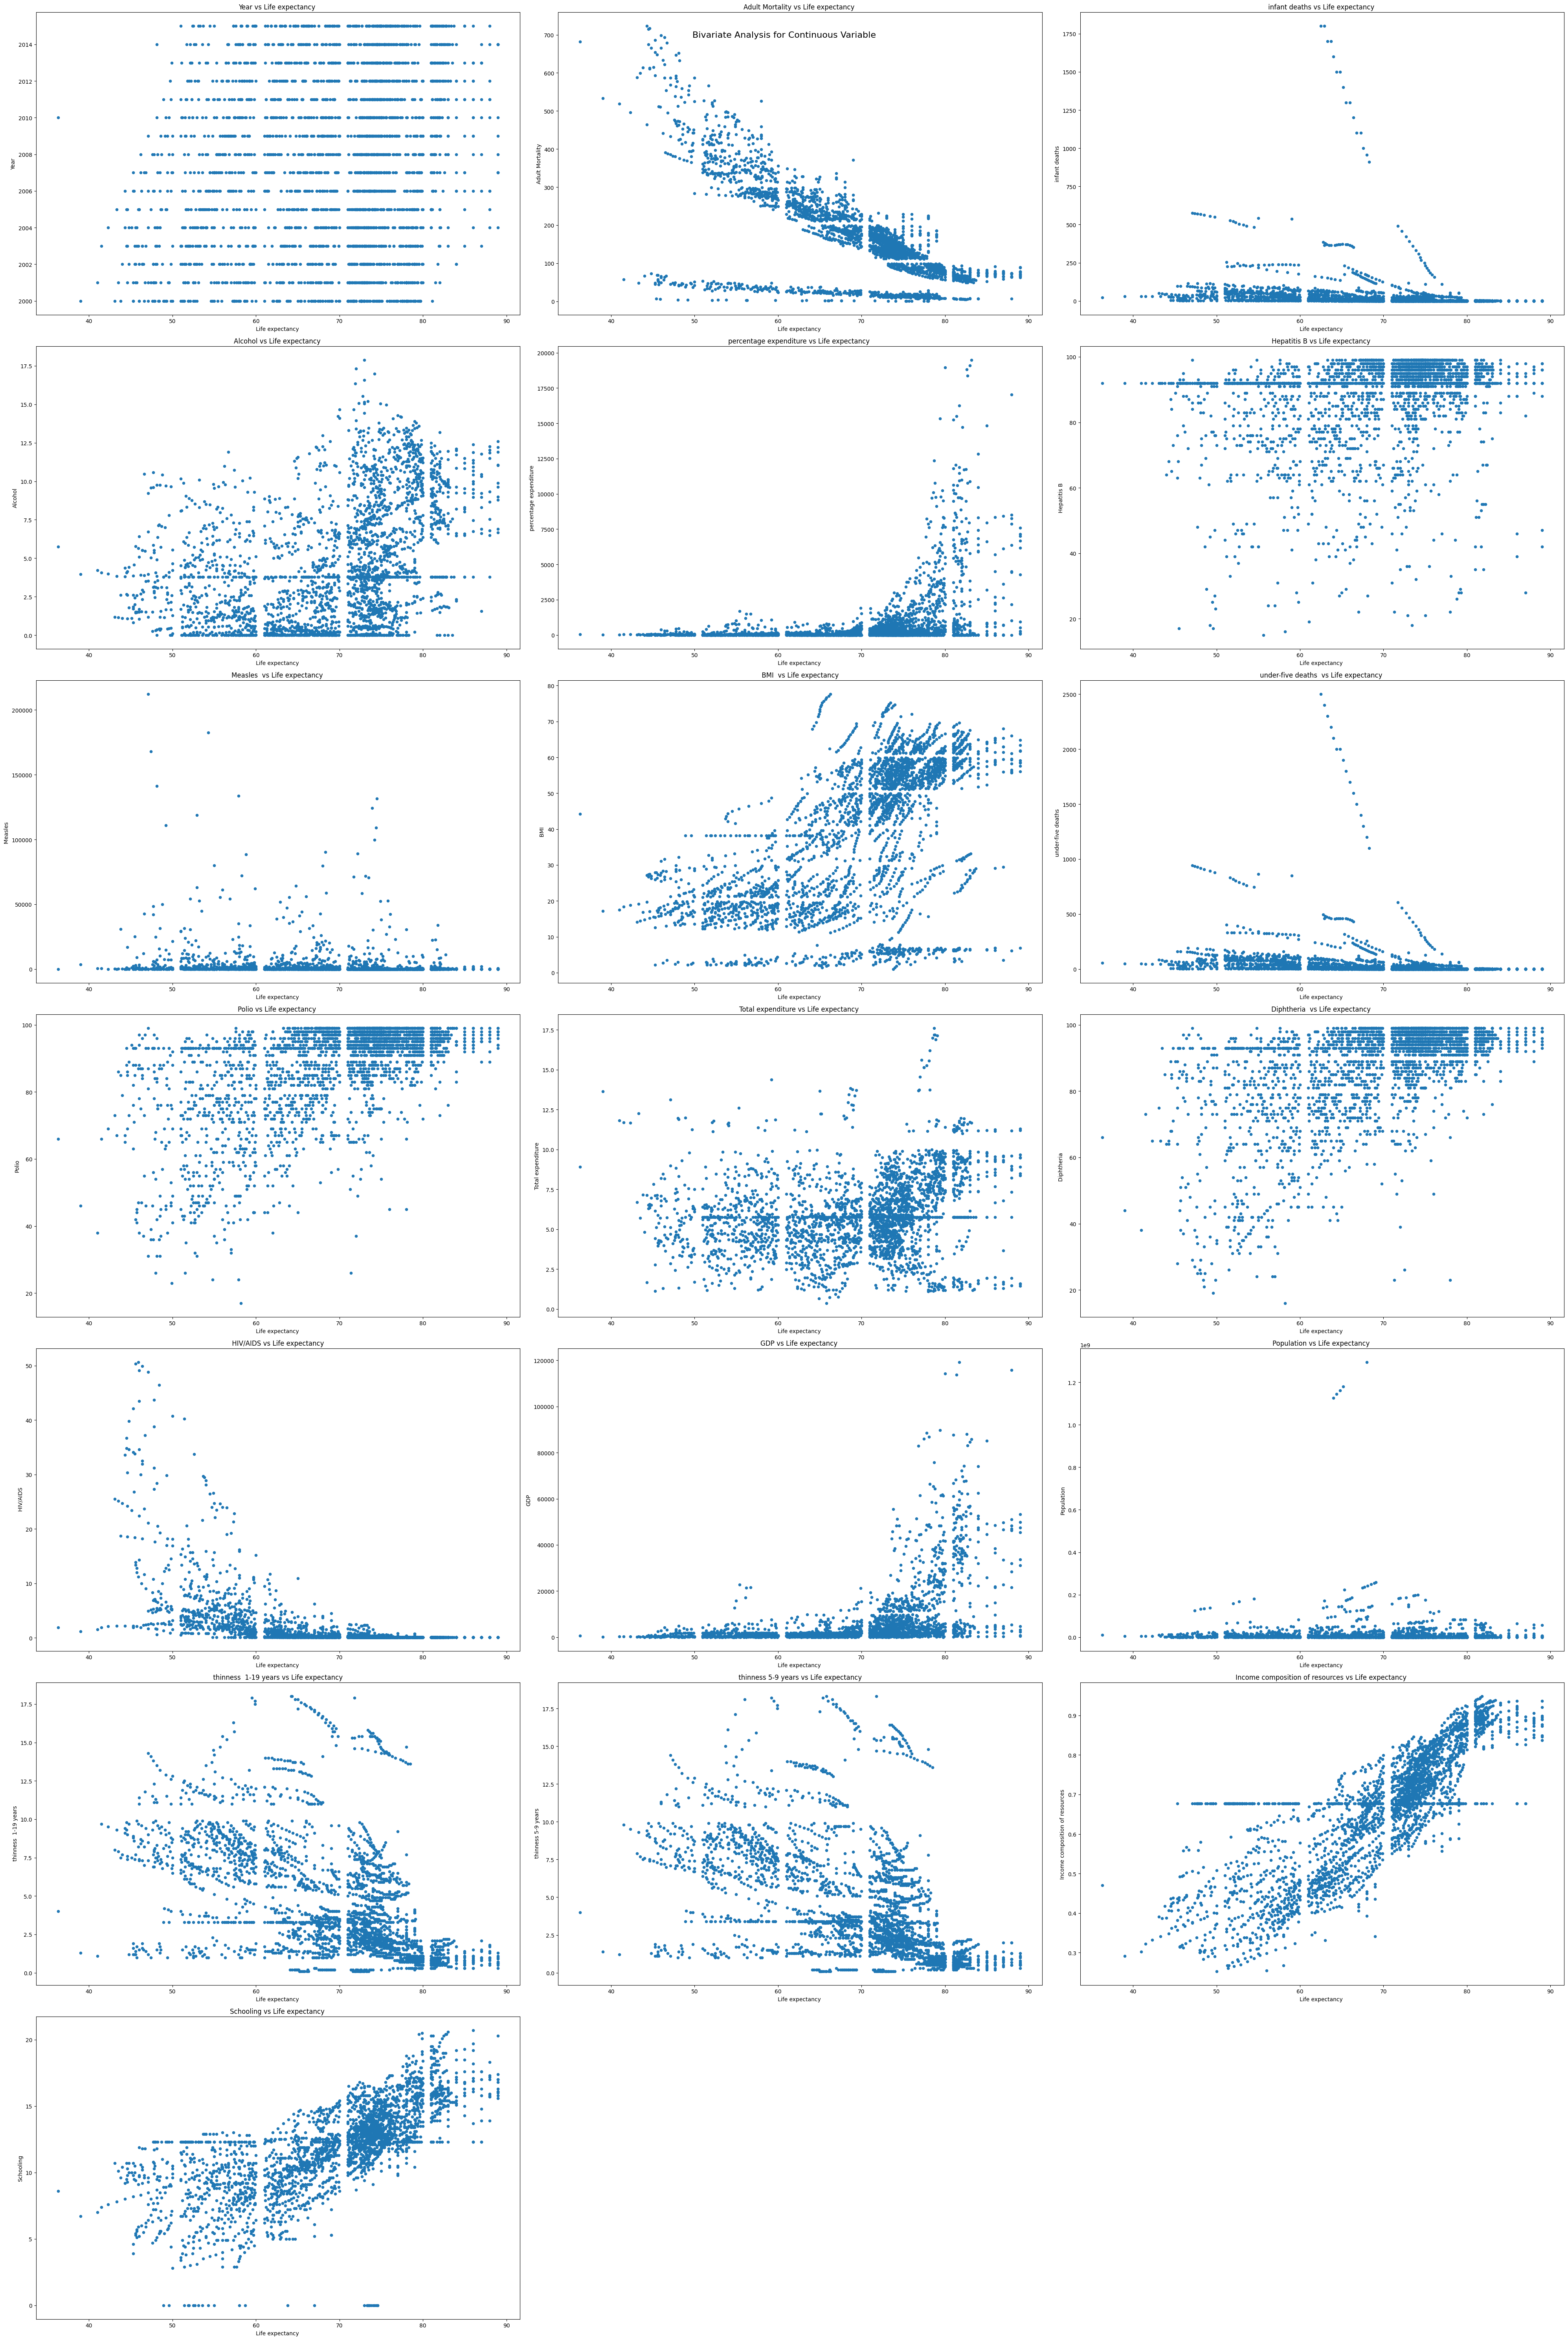

In [19]:
cont_var = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 
            ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 
            ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Target = 'Life expectancy '
contbivariate(LED1,cont_var,Target)

In [20]:
#Checking the correlation matrix with the help of heatmap
def correlationfunc(inpdata,contvar,Target,Threshold):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr_matrix = inpdata[contvar + [Target]].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f",annot_kws={"size": 6})
    plt.title('Correlation Heatmap of Predictors and Target')
    plt.show()
    #returning the list which has correlation greater than threshold value
    Selected_Predictors_cont = corr_matrix[corr_matrix[Target].abs()>=Threshold].index.to_list()
    #removing the traget variable
    Selected_Predictors_cont.pop(len(Selected_Predictors_cont)-1)
    print("The Related Continuous predictor with Target variable is :")
    return Selected_Predictors_cont;

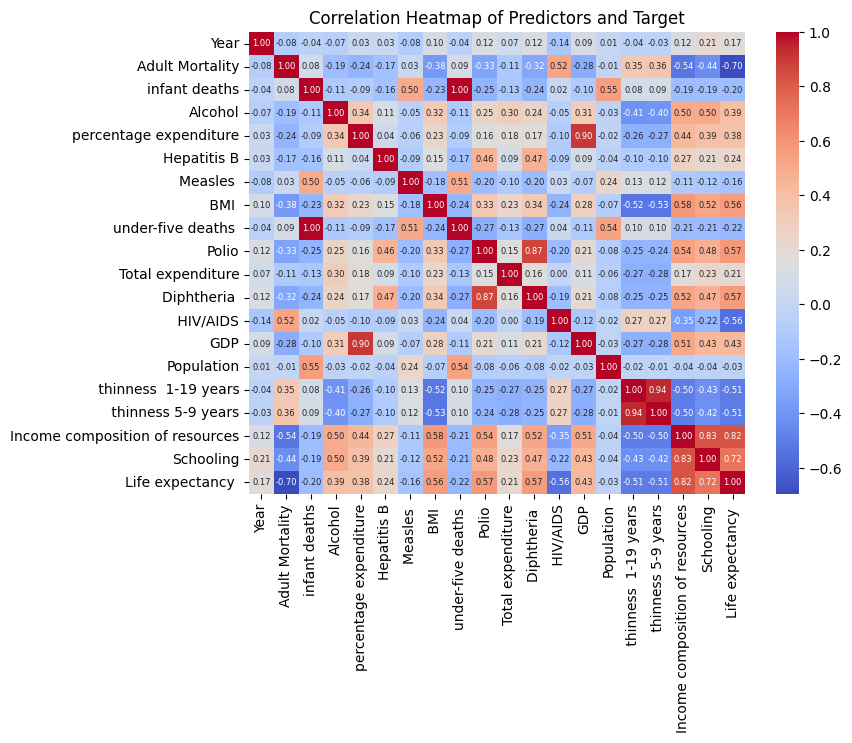

The Related Continuous predictor with Target variable is :


['Adult Mortality',
 ' BMI ',
 'Polio',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [21]:
cont_var = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 
            ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 
            ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Target = 'Life expectancy '
correlationfunc(LED1,cont_var,Target,0.4)

In [22]:
#Bivariate Analysis - Categorical vs Target. Defining a function to plot Categorical vs Target variable.
def catbivariate(inpdata,Catvar,Target):
    import matplotlib.pyplot as plt
    import math
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Catvar)/3),figsize = (20,5))
    fig.suptitle("Bivariate Analysis for Categorical Variable",fontsize=16)
    subplot.flatten()
    for i,cat in enumerate(Catvar):
        inpdata.groupby([cat])[Target].count().plot(kind='bar',ax=subplot[i])
        subplot[i].set_title(f"{cat} vs {Target}")
    #removing unused subplot
    for i in range(len(Catvar), len(subplot)):
        subplot[i].remove()

In [23]:
#Bivariate Analysis - Categorical vs Target (Box plot)
def bivariateboxplot(inpdata,Catvar,Target):
    import matplotlib.pyplot as plt
    import math
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Catvar)/3),figsize = (20,5))
    subplot = subplot.flatten()
    for i,cat in enumerate(Catvar):
        inpdata.boxplot(column=Target,by=cat,ax=subplot[i])
        subplot[i].set_title(f"{cat} vs {Target}")
    plt.suptitle("Bivariate Analysis for Categorical Variable - Boxplot", fontsize=16)
    #removing unused subplot
    for i in range(len(Catvar), len(subplot)):
        subplot[i].remove()

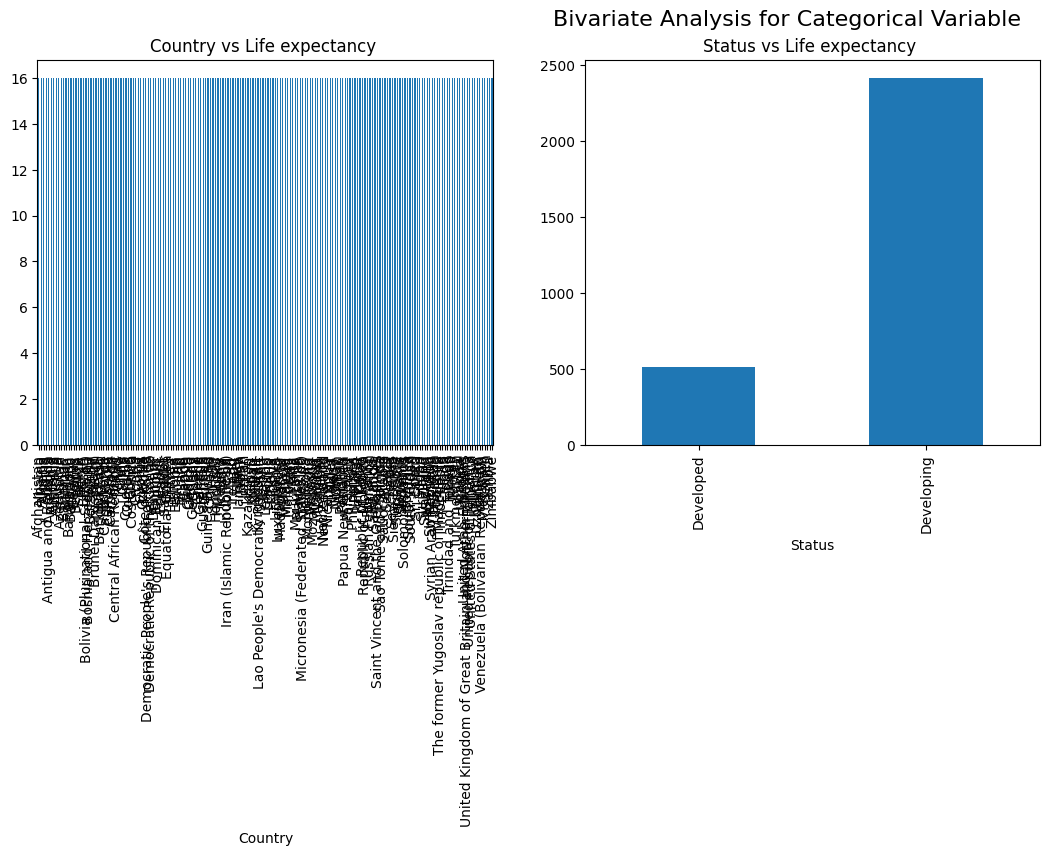

In [24]:
Catvar = ['Country', 'Status']
Target = 'Life expectancy '
catbivariate(LED1,Catvar,Target)

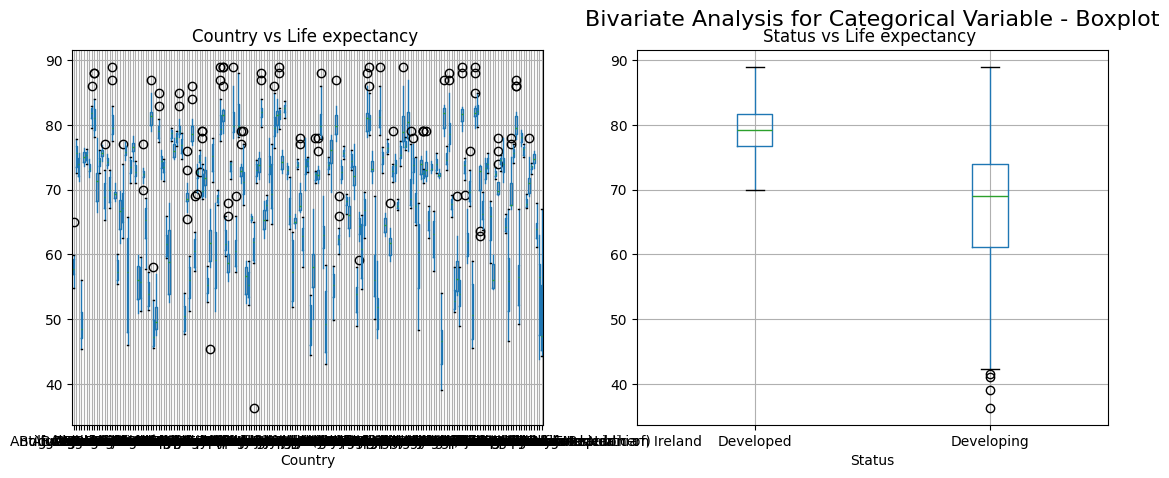

In [25]:
Catvar = ['Country', 'Status']
Target = 'Life expectancy '
bivariateboxplot(LED1,Catvar,Target)

In [61]:
#To deterimine the best categorical predictor correlated with the Target variable, we use Anova test.
#Testing ANOVA results for the Categorical data.
def AnovaTest(inpdata,Catvar,Target):
    from scipy.stats import f_oneway
    Selected_Predictors_cat =[]
    for cat in Catvar:
        #Grouping the Target Variable on the basis of the category of each field.
        Groupeddata = inpdata.groupby(cat)[Target].apply(list)
        Anova_result = f_oneway(*Groupeddata)
        #If the p-value is less than 0.05, that means the null hypothesis is rejected and the predictor is correlated
        if Anova_result[1]<0.05:
            print(f"{cat} is correlated with {Target} and the p-value is {Anova_result[1]}")
            Selected_Predictors_cat.append(cat)
        else:
            print(f"{cat} is not correlated with {Target} and the p-value is {Anova_result[1]}")      
    return Selected_Predictors_cat

In [62]:
Catvar = ['Country', 'Status']
Target = 'Life expectancy '
print("\nThe selected Categorical Predictors :",AnovaTest(LED1,Catvar,Target))

Country is correlated with Life expectancy  and the p-value is 0.0
Status is correlated with Life expectancy  and the p-value is 2.4650861700059935e-170

The selected Categorical Predictors : ['Country', 'Status']


In [63]:
Predictors = ['Adult Mortality',' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
 ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status']

In [64]:
print(LED1['Status'].value_counts(),"\n")
#coneverting the Status column to numeric
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LED1['Status'] = LE.fit_transform(LED1['Status'])
print(LED1['Status'].value_counts())

Status
Developing    2416
Developed      512
Name: count, dtype: int64 

Status
1    2416
0     512
Name: count, dtype: int64


In [65]:
X = LED1[Predictors]
Y = LED1[Target].values

# Data Processing

In [66]:
# Data pre-processing for Machine Learning
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.36288089, 0.23629243, 0.92682927, ..., 0.32517986, 0.48792271,
        1.        ],
       [0.37396122, 0.22976501, 0.5       , ..., 0.32086331, 0.48309179,
        1.        ],
       [0.36980609, 0.2232376 , 0.54878049, ..., 0.31223022, 0.47826087,
        1.        ],
       ...,
       [0.09972299, 0.33028721, 0.68292683, ..., 0.25035971, 0.48309179,
        1.        ],
       [0.94875346, 0.32506527, 0.7195122 , ..., 0.25035971, 0.47342995,
        1.        ],
       [0.91966759, 0.31984334, 0.74390244, ..., 0.26043165, 0.47342995,
        1.        ]])

In [67]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2342, 11) (586, 11) (2342,) (586,)


# Model Selection

In [68]:
# defining all the models and their parameter grids
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Ridge': (Ridge(), {'alpha': [0.01, 0.1, 1, 2, 5, 10], 'solver': ['auto', 'saga', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
                        'fit_intercept': [True, False]}),
    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1, 2, 5, 10], 'positive': [False, True], 'fit_intercept': [True, False],}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50,100,150,200], 'max_depth': [3, 4, 5],
                                                'max_features': ['sqrt', 'log2', 'auto', None], 'bootstrap': [True, False]}),
    'XGBoost': (xgb.XGBRegressor(), {'n_estimators': [50,100,150,200], 'learning_rate': [0.01, 0.1, 0.3], 
                                     'max_depth': [3, 4, 5], 'subsample': [0.8,1], 'colsample_bytree': [0.8,1]}),
    'GBR': (GradientBoostingRegressor(), {'n_estimators': [50,100,150,200], 'learning_rate': [0.01, 0.1, 0.3], 
                                          'max_depth': [3, 4, 5], 'subsample': [0.8,1]}),
    'AdaBoost': (AdaBoostRegressor(), {'n_estimators': [50,100,150,200], 'learning_rate': [0.01, 0.1, 1.0]}),
    'SVM': (SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2], 'kernel': ['rbf', 'linear']}),
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2]})
}

In [69]:
#defining a function which returns the accuracy of each model with the best parameter.
def best_regression_model_evaluation(model, X_train, X_test, Y_train, Y_test):
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    # Metrics
    r2_train = r2_score(Y_train, Y_pred_train)
    r2_test = r2_score(Y_test, Y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
    mape_train = mean_absolute_percentage_error(Y_train, Y_pred_train)
    mape_test = mean_absolute_percentage_error(Y_test, Y_pred_test)
    return {
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'MAPE Train (%)': 100*mape_train,
        'MAPE Test (%)': 100*mape_test,
        'R2 Difference': r2_train - r2_test}

In [70]:
results = [] #blank list which contains the model name, parameters and also the error rates
for name, (model, param_grid) in models.items():
    grid = GridSearchCV(model, param_grid, scoring='r2', cv=5, n_jobs=-1) #selects each model and combination of parameters
    grid.fit(X_train, Y_train)
    metrics = best_regression_model_evaluation(grid.best_estimator_, X_train, X_test, Y_train, Y_test)
    # Returns the accuracy scores of the best model selected from Grid search
    row = {'Model': name, 'Best Params': grid.best_params_, **metrics}
    results.append(row)
#printing the summary of each of the model's accuracy with the best parameters
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2 Difference")

,Model,Best Params,R2 Train,R2 Test,RMSE Train,RMSE Test,MAPE Train (%),MAPE Test (%),R2 Difference
5,AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 50}",0.906672,0.899754,2.925255,2.944699,3.496928,3.445856,0.006918
2,Random Forest,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.933511,0.917736,2.469064,2.667551,2.652647,2.825984,0.015776
0,Ridge,"{'alpha': 1, 'fit_intercept': True, 'solver': ...",0.838809,0.817208,3.844396,3.976354,4.338967,4.407568,0.021601
1,Lasso,"{'alpha': 0.01, 'fit_intercept': True, 'positi...",0.838636,0.814254,3.846459,4.008361,4.318333,4.419589,0.024382
6,SVM,"{'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}",0.909590,0.885117,2.879166,3.152355,2.934823,3.082701,0.024473
3,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.990778,0.961389,0.919547,1.827530,0.916203,1.817619,0.029389
4,GBR,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.992590,0.955635,0.824275,1.958971,0.856684,1.912758,0.036955
7,KNN,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",1.000000,0.936780,0.000000,2.338478,0.000000,2.051887,0.063220


Hence from the model the best model is AdaBoost with learning rate 1 and n_estimators 50

# Final Prediction

In [83]:
#predicting with the final model
model = AdaBoostRegressor(n_estimators = 50, learning_rate= 1.0)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)

print("The R2 score of the final model: ",r2_score(Y_test, Y_pred_test))
print("The RMSE of the final model: ",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))
print("The MAPE of the final model: ",mean_absolute_percentage_error(Y_test, Y_pred_test))

PredictedData = pd.DataFrame()
PredictedData['Actual'] = Y_test
PredictedData['Predicted'] = Y_test_pred
PredictedData.head(10)

The R2 score of the final model:  0.897583271459029
The RMSE of the final model:  2.976404845890162
The MAPE of the final model:  0.03517698321670397


,Actual,Predicted
0,56.5,53.133333
1,73.0,68.984774
2,82.5,80.764124
3,75.6,73.717417
4,53.0,53.814019
5,65.2,68.057071
6,72.4,72.841606
7,74.1,77.252174
8,77.0,72.690577
9,67.8,71.790000


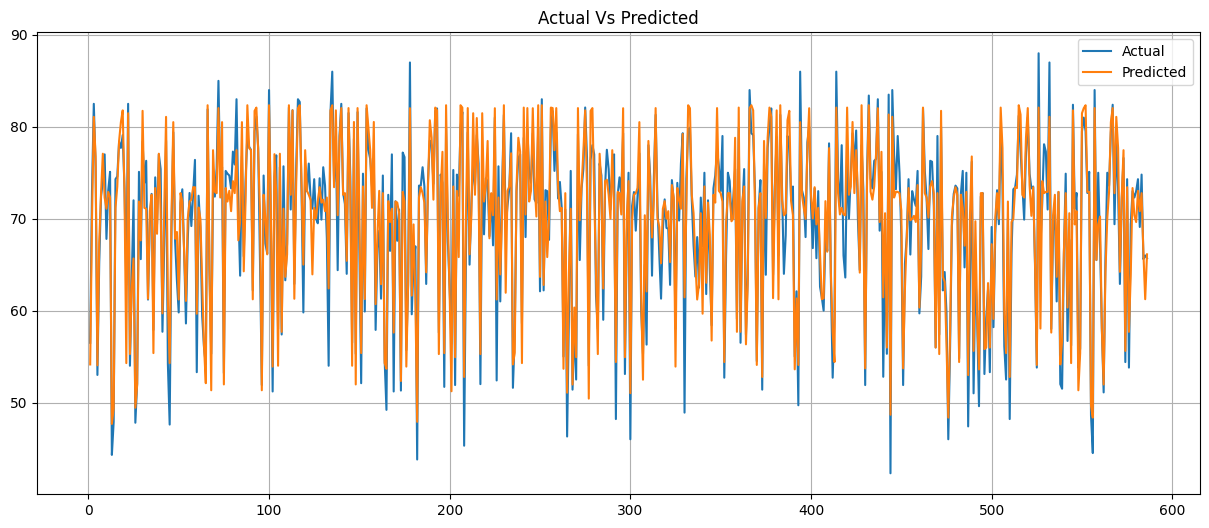

In [85]:
#Plotting the actual Vs Predicted
x=np.arange(1,len(Y_test)+1)
plt.figure(figsize=(15,6))
plt.plot(x,Y_test,label='Actual')
plt.plot(x,Y_pred_test,label='Predicted')
plt.title("Actual Vs Predicted")
plt.legend(loc="best")
plt.grid(True)

<Axes: >

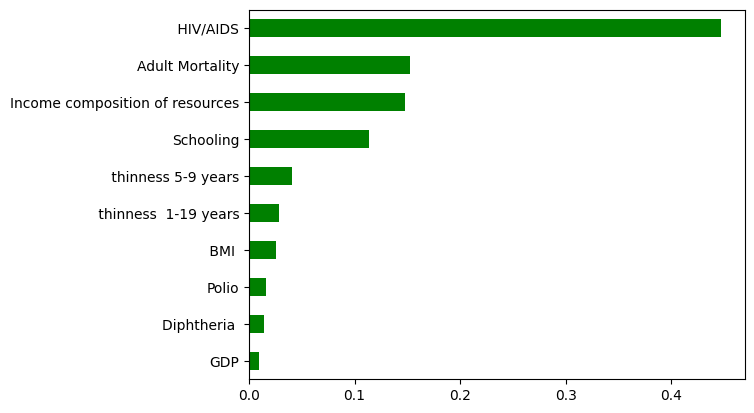

In [94]:
#Plotting the feauture importance
Predictors = ['Adult Mortality',' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
 ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status']
feature_importances = pd.Series(model.feature_importances_, index = Predictors)
feature_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh',color = "Green")

### Interpretation of the Chart
The most influential feature is **HIV/AIDS**, which has the highest importance score, meaning it plays the largest role in determining the model's output compared to the other predictors.

Features like **Adult Mortality**, **Income composition of resources**, and **Schooling** also contribute significantly, but less than HIV/AIDS.

Predictors such as **thinness 5-9 years**, **thinness 1-19 years**, **BMI**, **Polio**, **Diphtheria**, and **GDP** have relatively lower importance scores, indicating they have less influence on the model's outputs.